<a href="https://colab.research.google.com/github/nightted/Travel-Recommend-project/blob/main/Googlemap_Store_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A project to recommend the hotels according to the surrounding stores and attractions

In [96]:
!pip install googlemaps

In [263]:
import googlemaps
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from sklearn.cluster import KMeans
import time 
import os 

In [98]:
GOOGLE_API_KEY =  # need to be hidden :)
maps = googlemaps.Client(key = GOOGLE_API_KEY)
position = ["遠東百貨 花蓮店"]
result = maps.geocode(position)
location = result[0]['geometry']['location']
#re = maps.places_nearby( keyword = '餐廳' , location = location , radius = 1000 )

In [122]:
# get more stores by moving location center and search 
def delta_location( location , radius ):
    
    delta_point = radius / 100000 # how many segments of lag,lng in term of radius (1000m radius <=> 0.1 lag ,lng )
    lng , lat = location['lng'] , location['lat']
    return [ {'lng': lng + delta_point*lng_delta , 'lat': lat + delta_point * lat_delta } for lng_delta in [2,1,0,-1,-2] for lat_delta in [2,1,0,-1,-2] ] 

# get store information with location , keyword , search radius  
def get_store_nearby( keyword , location ,  radius , next_page_token , data ):
    
    if data == None:      
        data = []

    res = maps.places_nearby( page_token = next_page_token , keyword = keyword , location = location , radius = 1000 )   #get stores list nearby   
    for store_inform in res['results']:

        lat_lng = store_inform['geometry']['location']
        lat , lng = lat_lng['lat'] , lat_lng["lng"]
        store_name = store_inform['name']
        rating = store_inform.get('rating',None)

        information = {'location' : [lng , lat] , 
                       'store_name' : store_name, 
                       'rating' : rating } 

        if rating and information not in data: # discard None-rating store
            data.append(information)
        
    next_page_token = res.get( 'next_page_token' , None) # get if token exsit or return None 

    return next_page_token , data

# get store information with location , keyword , search radius (plus the change pages and move search location)
def grab_nearby_point( keyword , location ,  radius , next_page_token = None , data = None ):
    
    for idx , location_in_radius in enumerate(delta_location(location , radius)): 

        print(f'finish [{idx+1}/{len(delta_location(location , radius))}] parts !')       
        while True : # change page
            next_page_token , data = get_store_nearby( keyword , location_in_radius ,  radius , next_page_token = next_page_token , data = data )
            if next_page_token == None :
                break
            time.sleep(3) #set time sleep to avoid request too often !
    return data   

# store weighting
def rating_modify(rating):
    
    if  4.8 < rating <= 5.0 :
        score = 512.0
    elif 4.6 < rating <= 4.8 :
        score = 256.0
    elif 4.4 < rating <= 4.6 :
        score = 128.0
    elif 4.2 < rating <= 4.4 :
        score = 64.0
    elif 4.0 < rating <= 4.2 :
        score = 32.0
    elif 3.8 < rating <= 4.0 :
        score = 16.0
    elif 3.6 < rating <= 3.8 :
        score = 8.0
    elif 3.4 < rating <= 3.6 :
        score = 4.0
    elif 3.2 < rating <= 3.4 :
        score = 2.0
    else:
        score = 1.0
    
    return score

def distance(a , b):

    a_x , a_y = a[0] , a[1]
    b_x , b_y = b[0] , b[1]
    return ((a_x-b_x)**2 + (a_y-b_y)**2 )**0.5

def save_pkl(path  , data):
    with open(path , "wb") as pkl :
        pickle.dump(data , pkl)
        
def load_pkl(path):
    with open(path , "rb") as pkl :
        data = pickle.load(pkl) 
    return data

In [207]:
data_rest = grab_nearby_point('餐廳', location , 500) #餐廳 store

finish [1/25] parts !
finish [2/25] parts !
finish [3/25] parts !
finish [4/25] parts !
finish [5/25] parts !
finish [6/25] parts !
finish [7/25] parts !
finish [8/25] parts !
finish [9/25] parts !
finish [10/25] parts !
finish [11/25] parts !
finish [12/25] parts !
finish [13/25] parts !
finish [14/25] parts !
finish [15/25] parts !
finish [16/25] parts !
finish [17/25] parts !
finish [18/25] parts !
finish [19/25] parts !
finish [20/25] parts !
finish [21/25] parts !
finish [22/25] parts !
finish [23/25] parts !
finish [24/25] parts !
finish [25/25] parts !


In [206]:
data_con = grab_nearby_point('便利商店', location , 500) #便利商店 store

finish [1/25] parts !
finish [2/25] parts !
finish [3/25] parts !
finish [4/25] parts !
finish [5/25] parts !
finish [6/25] parts !
finish [7/25] parts !
finish [8/25] parts !
finish [9/25] parts !
finish [10/25] parts !
finish [11/25] parts !
finish [12/25] parts !
finish [13/25] parts !
finish [14/25] parts !
finish [15/25] parts !
finish [16/25] parts !
finish [17/25] parts !
finish [18/25] parts !
finish [19/25] parts !
finish [20/25] parts !
finish [21/25] parts !
finish [22/25] parts !
finish [23/25] parts !
finish [24/25] parts !
finish [25/25] parts !


In [172]:
data_b = grab_nearby_point('扁食', location , 500) #扁食 store

finish [1/25] parts !
finish [2/25] parts !
finish [3/25] parts !
finish [4/25] parts !
finish [5/25] parts !
finish [6/25] parts !
finish [7/25] parts !
finish [8/25] parts !
finish [9/25] parts !
finish [10/25] parts !
finish [11/25] parts !
finish [12/25] parts !
finish [13/25] parts !
finish [14/25] parts !
finish [15/25] parts !
finish [16/25] parts !
finish [17/25] parts !
finish [18/25] parts !
finish [19/25] parts !
finish [20/25] parts !
finish [21/25] parts !
finish [22/25] parts !
finish [23/25] parts !
finish [24/25] parts !
finish [25/25] parts !


In [163]:
# grab the store contain some keyword (ex: 扁食)
def grab_keyword_store(data , keyword = ''):
 
  x ,y , x_y , rat , name = [] , [] , [] , [] , []
  for item in data:
    if keyword in item["store_name"] : # if keyword == None , grab all stores
      x.append(item['location'][0])
      y.append(item['location'][1])
      x_y.append(item['location'])
      rat.append(rating_modify(item['rating'])) # rating func 要修正XD , EX: 4.8~5.0 => 10 分 , 4.6~4.8 => 9 分 , ... , < 3.0 => 1分
      name.append(item['store_name'])

  return np.array(x) , np.array(y) , np.array(x_y) ,np.array(rat) ,name

In [218]:
data_all = data_rest + data_con

In [223]:
# The store contain convenience store & resturant (represent the daily demands store)
x , y , x_y , rating , name = grab_keyword_store(data_all)

In [211]:
# The store of target store (what you want to eat or play)
x_b , y_b , x_y_b , rating_b , name_b = grab_keyword_store(data_b,"扁食")

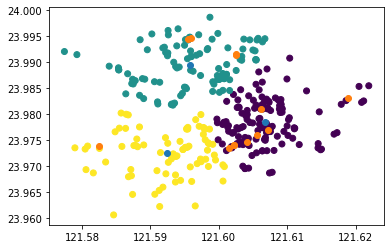

In [259]:
# plot the KM of daily demands store and calculate each cluster center 
kmeans = KMeans(n_clusters=3).fit(x_y)
plt.scatter(x_y[:,0],x_y[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.scatter(x_y_b[:,0] , x_y_b[:,1])

In [257]:
# grouping the target by the cluster center calculate above
cluster_num = 3
group = np.zeros(len(x_y_b))
for store_idx , position in enumerate(x_y_b):
  
  min = 1000000000
  for center_idx , cluster_center in enumerate(kmeans.cluster_centers_): 
    if distance(position , cluster_center) < min :
      min = distance(position , cluster_center)
      group_idx = center_idx

  group[store_idx] = group_idx

In [258]:
group

array([1., 2., 1., 2., 1., 1., 1., 1., 1., 2., 2., 1., 0.])

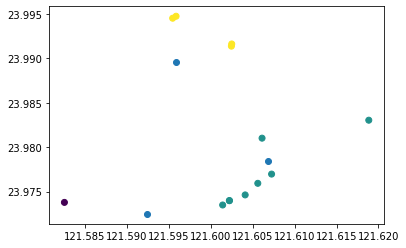

In [261]:
kmeans = KMeans(n_clusters=3).fit(x_y)
#plt.scatter(x_y[:,0],x_y[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])
plt.scatter(x_y_b[:,0] , x_y_b[:,1] , c=group)

In [264]:
path = '/content/drive/My Drive/Colab Notebooks/Travel Recommend Project/City data/Hualien'
save_pkl(os.path.join(path ,'data_rest') , data_rest)
save_pkl(os.path.join(path ,'data_con') , data_con)
save_pkl(os.path.join(path ,'data_b') , data_b)

In [183]:
# calculate the foucs_center where "best-food" is clutering at 
# TODO: need to modify due to new definition of target and surrounding stores
x_focus , y_focus = (x*rating).sum() / rating.sum() , (y*rating).sum() / rating.sum()
x_focus , y_focus

(121.6005545024866, 23.97982576420864)